In [3]:
from matplotlib import pyplot as plt
from scipy.misc import derivative
from math import factorial

class TaylorSeries():
    def __init__(self, f, order, center = 0):
        self.center = center
        self.f = f
        self.order = order
        self.d_pts = order * 2
        self.coefficients = []

        if self.d_pts % 2 == 0:
            self.d_pts += 1

        self.__find_coefficients()

    def __find_coefficients(self):
        for i in range(0, self.order + 1):
            self.coefficients.append(round(derivative(
                self.f, self.center, n=i, order=self.d_pts)/factorial(i), 5))

    def print_equation(self):
        print(self.coefficients)

    def approx_value(self, x):
        fx = 0
        for i in range(len(self.coefficients)):
            fx += self.coefficients[i] * ((x - self.center) ** i) # coefficient to the *nth term (** power op)

        return fx

    def get_func(self):
        return self.f

def square(x):
    return x ** 2

def cube(x):
    return x ** 3

[0.0, -0.0, 0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0]


/tmp/ipykernel_293423/438421245.py:20: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  self.coefficients.append(round(derivative(
/tmp/ipykernel_293423/438421245.py:20: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  self.coefficients.append(round(derivative(


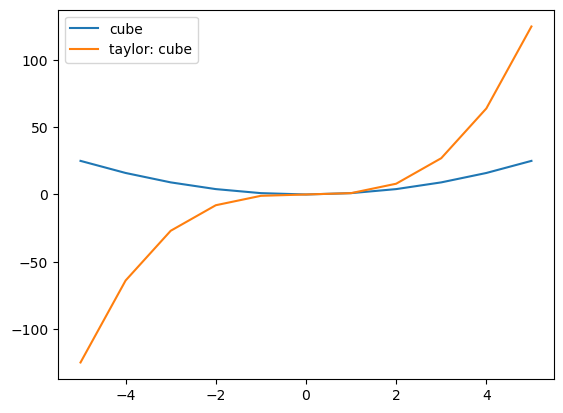

In [4]:
if __name__ == "__main__":
    x = []
    y = []
    bot = -5
    top = 6

    ts = TaylorSeries(cube, 15, 0)
    ts.print_equation()

    for i in range(bot, top):
        x.append(i)
        y.append(square(i))

    plt.plot(x, y, label=(ts.get_func().__name__))

    x.clear()
    y.clear()

    for i in range(bot, top):
        x.append(i)
        y.append(ts.approx_value(i))

    plt.plot(x, y, label=("taylor: " + ts.get_func().__name__))

    plt.legend()
    plt.show()